In [2]:
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [31]:
input_shape=(424,424,3)

In [6]:
from os import listdir
from PIL import Image as PImage

imagesList = listdir("images_training_2964/")
x_train = []
for image in imagesList:
    img = PImage.open("images_training_2964/" + image)
    x_train.append(img)

In [7]:
imagesList = listdir("images_test_732/")
x_test = []
for image in imagesList:
    img = PImage.open("images_test_732/" + image)
    x_test.append(img)

In [65]:
features = list()
with open("features.txt") as f:
    for line in f:
        features.append(line.split()[1])
print(len(features))

38


In [75]:
labels_df = pd.read_csv("training_solutions.txt", delim_whitespace = False)
#labels_df.columns = features

y_train = labels_df[0:2964]

y_test = labels_df[2964:3696]
labels_df.head()

,GalaxyID,Class1.1,Class1.2,Class1.3,Class2.1,Class2.2,Class3.1,Class3.2,Class4.1,Class4.2,...,Class9.3,Class10.1,Class10.2,Class10.3,Class11.1,Class11.2,Class11.3,Class11.4,Class11.5,Class11.6
0,100008,0.383147,0.616853,0.000000,0.000000,0.616853,0.038452,0.578401,0.418398,0.198455,...,0.000000,0.279952,0.138445,0.000000,0.000000,0.092886,0.0,0.0,0.0,0.325512
1,100023,0.327001,0.663777,0.009222,0.031178,0.632599,0.467370,0.165229,0.591328,0.041271,...,0.018764,0.000000,0.131378,0.459950,0.000000,0.591328,0.0,0.0,0.0,0.000000
2,100053,0.765717,0.177352,0.056931,0.000000,0.177352,0.000000,0.177352,0.000000,0.177352,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,100078,0.693377,0.238564,0.068059,0.000000,0.238564,0.109493,0.129071,0.189098,0.049466,...,0.000000,0.094549,0.000000,0.094549,0.189098,0.000000,0.0,0.0,0.0,0.000000
4,100090,0.933839,0.000000,0.066161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000


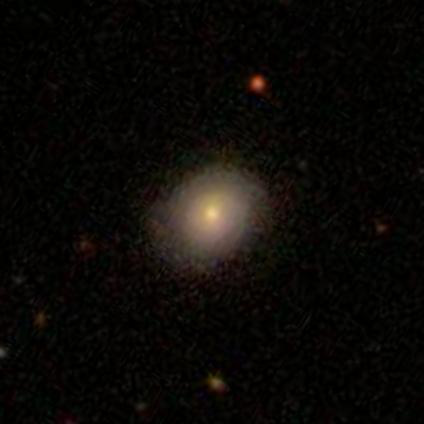

In [11]:
x_train[0]
#plt.figure(figsize=(10, 10))
#plt.imshow(x_train[0])
#for images in x_train:
#    for i in range(9):
#        ax = plt.subplot(3, 3, i + 1)
#        plt.imshow(x_train[i])
#        plt.axis("off")

array(['100008,0.383147,0.616853,0,0,0.616853,0.038452149,0.578400851,0.418397819,0.198455181,0,0.104752126,0.512100874,0,0.054453,0.945547,0.201462524,0.181684476,0,0,0.0272265,0,0.0272265,0,0,0,0,0,0,0.279952491,0.138445328,0,0,0.092885571,0,0,0,0.325512248'],
      dtype=object)

In [20]:
from tensorflow.python.keras.preprocessing.image import load_img, img_to_array

imgs = x_train
img_array = np.array([img_to_array(img) for img in imgs])

In [40]:
imgs = x_test
test_img_array = np.array([img_to_array(img) for img in imgs])

In [39]:
img_array

array([[[[ 2.,  2.,  0.],
         [ 4.,  4.,  2.],
         [ 5.,  5.,  3.],
         ...,
         [ 2.,  2.,  2.],
         [ 2.,  2.,  2.],
         [ 2.,  2.,  2.]],

        [[ 5.,  5.,  3.],
         [ 6.,  6.,  4.],
         [ 6.,  6.,  4.],
         ...,
         [ 2.,  2.,  2.],
         [ 2.,  2.,  2.],
         [ 2.,  2.,  2.]],

        [[ 7.,  7.,  5.],
         [ 8.,  8.,  6.],
         [ 8.,  8.,  6.],
         ...,
         [ 2.,  2.,  2.],
         [ 2.,  2.,  2.],
         [ 3.,  3.,  3.]],

        ...,

        [[ 6.,  6.,  4.],
         [ 5.,  5.,  3.],
         [ 4.,  4.,  2.],
         ...,
         [ 4.,  4.,  2.],
         [ 2.,  2.,  0.],
         [ 0.,  0.,  0.]],

        [[ 6.,  6.,  4.],
         [ 5.,  5.,  3.],
         [ 4.,  4.,  2.],
         ...,
         [ 2.,  2.,  0.],
         [ 1.,  1.,  0.],
         [ 0.,  0.,  0.]],

        [[ 6.,  6.,  4.],
         [ 5.,  5.,  3.],
         [ 4.,  4.,  2.],
         ...,
         [ 1.,  1.,  0.],
        

In [80]:
model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=input_shape),
    layers.Conv2D(16, kernel_size=(3,3), activation='tanh', input_shape=input_shape),
    layers.Conv2D(32, (3,3), activation='tanh'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(32, (3,3), activation='tanh'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(32, (3,3), activation='tanh'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(32, (3,3), activation='tanh'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(32, activation='tanh'),
    layers.Dropout(0.5),
    layers.Dense(38, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 424, 424, 3)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 422, 422, 16)      448       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 420, 420, 32)      4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 210, 210, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 208, 208, 32)      9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 104, 104, 32)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 102, 102, 32)     

In [83]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [84]:
cnn_classifier = model.fit(
    img_array,
    y_train,
    steps_per_epoch=10,
    epochs=25,
    validation_data=(test_img_array,y_test),
    validation_steps=100
)

Epoch 1/25


ResourceExhaustedError:  OOM when allocating tensor with shape[297,422,422,16] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[node sequential_2/conv2d_10/BiasAdd (defined at <ipython-input-84-002db8c9c61a>:7) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_5398]

Function call stack:
train_function
